In [108]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from helper_functions import linear_model_summary

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# This is not good practice, but is appropriate here for a beginners class.
# This allows us to not fuss with image sizes later in the presentation.
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

## Regresssion: Analysing and Predicting A Coninuous Varaible.

**Regression** is the process of summarizing a continuous measurement with a statistical model.

### Loading and Inspecting the Data

Our example of regression will use a dataset about various sepcemins of single species of insect collected across two continents.  We will be interested in explaining how the insects wing span varies, as influenced by the other measurements in our dataset.

We'd like to load the `insects` data into python.  Our first step is to take a quick look at the raw data.

In [39]:
!head ./insects.csv

continent	latitude	wingsize	sex
1	35.5	901	0
1	37	896	0
1	38.6	906	0
1	40.7	907	0
1	40.9	898	0
1	42.4	893	0
1	45	913	0
1	46.8	915	0
1	48.8	927	0


`head` is actually a small command line program that displays the first 10 lines of a file.  We're using it here to inform our strategy for reading the data into python.

It looks like there are four columns in our dataset:

```
continent, latitude, wingsize, and sex
```

Each data element is seperated from the next by a tab charecter, this type of format is often called "tab seperated data".  Tab seperated data can be read into python using the `read_csv` function in the `pandas` library.

In [109]:
insects = pd.read_csv('./insects.csv', sep='\t')

Now we have the data in a python object:

In [5]:
insects

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0
5,1,42.4,893,0
6,1,45.0,913,0
7,1,46.8,915,0
8,1,48.8,927,0
9,1,49.8,924,0


We've got our four columns `continent, latitude, wingsize, and sex`.  We can see some short descriptions of their qualities using `info`:

In [6]:
insects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
continent    42 non-null int64
latitude     42 non-null float64
wingsize     42 non-null int64
sex          42 non-null int64
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


Alltogether:
    
  - `continent` is a column of integer values.  Looking at the data, it's only values are zero and one.
  - `latitude` has decimal values.
  - `wingsize` is another column of integers, but this one can take on any number in a wide range.
  - `sex` is another column of intergers, which also seems restricted to zeros and ones.
    
The zero/one columns are called **binay** or **indicator variables**, they measure a specific yes/no conditon.

  - `sex` is equal to one if the insect is male, and is zero if female.
  - `continent` is equal to one if from a first continent, zero if from a second.

### Exploratory Visualization

It is always a good idea to start making visualizations when confronted with a new set of data.  The most effective and flexible visualization is undoutably the **scatterplot**.

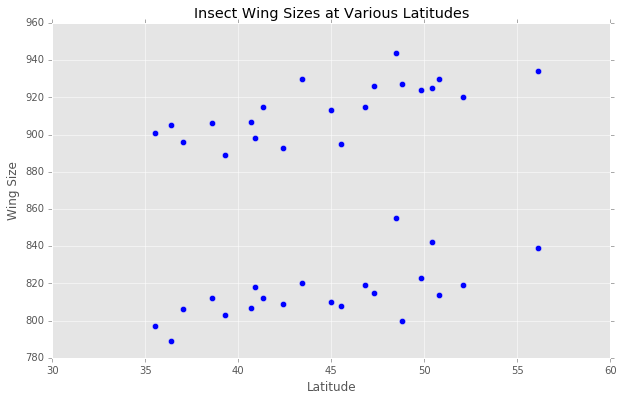

In [29]:
fig, ax = plt.subplots()

ax.scatter(insects.latitude, insects.wingsize, s=40)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wing Size")
ax.set_title("Insect Wing Sizes at Various Latitudes")

Here we have a scatterplot of `wingsize` against `latitude`.

**Discussion:** What patterns do you see in the scatterplot.  Can you form any hypothesies about the data?

Here are some thoughts:
    
  - The most promenent feature of this data is the two bands.  There seem to be two very well defined elongated clusters of data, with the average wingsize in one cluster much greater than in the other.
  - Within each cluster there is noticible tendency for wingsize to increase as latitude increases.

### Exploritory Data Analysis

This leads to a few questions we may wish to answer with the data.

  1. Are the two clusters associated with one of the other two varaibles in the dataset, continent or sex?
  2. Is the increase of wing size as latitude increases real or illusory?
  3. If the increase in wing size is real, does the *rate* of increase differ in the two clusters?
  
Let's answer each of these questions.

#### Are The Two Clusters Associated With Either Continent or Sex?

We can discover if the two clusters in the data are associated with either `continent` or `sex` through a well chosen visualization.  Let's make the same scatterplot from before, but color each point either red or blue, according to the value of `continent` or `sex`.

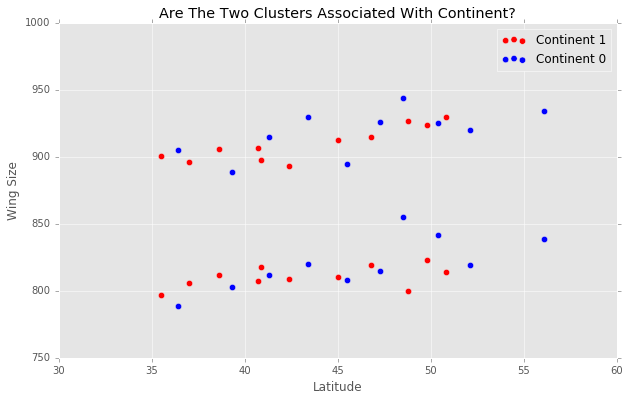

In [110]:
fig, ax = plt.subplots()

continent_boolean = insects.continent.astype(bool)
ax.scatter(insects.latitude[continent_boolean], 
           insects.wingsize[continent_boolean], 
           s=40, c="red", label="Continent 1")
ax.scatter(insects.latitude[~continent_boolean], 
           insects.wingsize[~continent_boolean],
           s=40, c="blue", label="Continent 0")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wing Size")
ax.set_title("Are The Two Clusters Associated With Continent?")
ax.legend()

The values of continent seem scattered randomly across the two clusters, so it does **not** seem like continent is associated with the clusters.

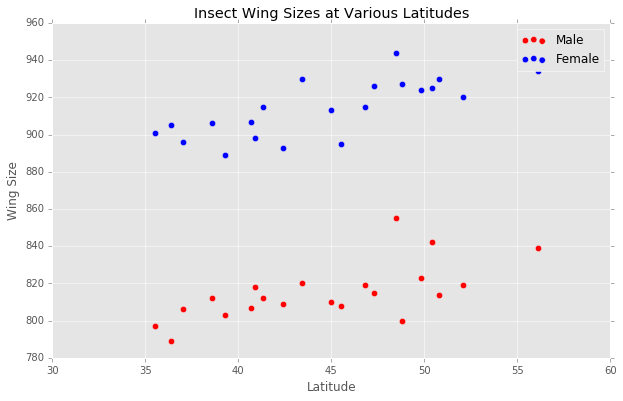

In [38]:
fig, ax = plt.subplots()

sex_boolean = insects.sex.astype(bool)
ax.scatter(insects.latitude[sex_boolean], 
           insects.wingsize[sex_boolean],
           s=40, c="red", label="Male")
ax.scatter(insects.latitude[~sex_boolean], 
           insects.wingsize[~sex_boolean],
           s=40, c="blue", label="Female")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wing Size")
ax.set_title("Insect Wing Sizes at Various Latitudes")
ax.legend()

There we go!

This is pretty definiative, the cluster of the larger insects are all female, and the cluster of smaller insects are all male.  This seems like enough evidence to conclude that the sex of the insect causes the data to cluster into two groups.

#### Is An Increasing Latitude Associated With an Increasing Wing Size?

This question is a little more sophisticated, and we need some new technology to answer it.

The idea is to create an equation:

$$ \text{Wing Span} \approx a + b \times \text{Latitude} $$

Then we can look at the number $b$, which tells us how we should expect `wingspan` to change as `latitude` changes.  If we find that $b > 0$, that's evidence that an increasing latitude is associated with an increasing wingspan.

I'll skip the technicalities, but the basic tool for creating equations like this is called **linear regression**.

In [113]:
linear_model = smf.ols(formula='wingsize ~ latitude', data=insects)
insects_model_result = linear_model.fit()
linear_model_summary(insects_model_result)

              Linear Model Summary             
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                780.53           64.53
latitude                   1.88            1.44


The linear regression has attempted to estimate the equation we are after, and it has returned:

$$ \text{Wing Span} \approx 780.53 + 1.88 \times \text{Latitude} $$

So we can expect an on averge increase of 1.88 wingspan for every increase in one latitude.